<a href="https://colab.research.google.com/github/asfaqahmedkazi/IMDBProject/blob/main/Sentiment_Analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Check the Dataset & Mount Google Drive**

---
1. Mount data from Google drive
2. Check the data availablility



In [1]:
#Connect to google Drive
from google.colab import drive
drive.mount("/content/gdrive")

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


In [2]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the "../input/" directory.
# For example, running this (by clicking run or pressing Shift+Enter) will list the files in the input directory

from subprocess import check_output
print(check_output(["ls", "/content/gdrive/MyDrive/IMDB Project Dataset"]).decode("utf8"))

# Any results you write to the current directory are saved as output.

imdb_master.csv



# **Library Section**

---
1. Import all the required libraries



In [30]:
################################################# import libraries ###########################################
!pip install plotly==3.10.0
import pandas as pd
import os
from nltk.corpus import stopwords
import string
import re
from nltk.stem.wordnet import WordNetLemmatizer
from nltk.tokenize import word_tokenize
from nltk.stem.snowball import SnowballStemmer
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.preprocessing import LabelEncoder
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.cluster import KMeans
from sklearn.metrics import adjusted_rand_score
from collections import Counter
import numpy as np
import matplotlib.pyplot as plt
import plotly.plotly as py
import operator
from sklearn.feature_extraction.text import CountVectorizer
from wordcloud import WordCloud
import time
from sklearn.metrics import accuracy_score
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import MultinomialNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.svm import SVC
from sklearn.cluster import AgglomerativeClustering
### Importing special library for Stopwords
import nltk
nltk.download('stopwords')
nltk.download('punkt')
nltk.download('wordnet')
#Import For modelling
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
from sklearn.model_selection import KFold, StratifiedKFold, train_test_split, cross_validate, cross_val_score
from sklearn.linear_model import LogisticRegression,SGDClassifier
from sklearn.model_selection import StratifiedKFold
from sklearn.pipeline import Pipeline

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


# **Define Functions**

---
Define all functions that will be used in the project

1.   Function to remove stop words
2.   Function to remove Punctuations
3.   Function for word normalization (Stemma & lemma)

In [4]:
def rem_sw(df):
    # Downloading stop words
    stop_words = set(stopwords.words('english'))

    # Removing Stop words from training data
    count = 0
    for sentence in df:
        sentence = [word for word in sentence.lower().split() if word not in stop_words]
        sentence = ' '.join(sentence)
        df.loc[count] = sentence
        count+=1
    return(df)

In [5]:
def rem_punc(df):
    count = 0
    for s in df:
        cleanr = re.compile('<.*?>')
        s = re.sub(r'\d+', '', s)
        s = re.sub(cleanr, '', s)
        s = re.sub("'", '', s)
        s = re.sub(r'\W+', ' ', s)
        s = s.replace('_', '')
        df.loc[count] = s
        count+=1
    return(df)

In [6]:
def lemma(df):

    lmtzr = WordNetLemmatizer()

    count = 0
    stemmed = []
    for sentence in df:    
        word_tokens = word_tokenize(sentence)
        for word in word_tokens:
            stemmed.append(lmtzr.lemmatize(word))
        sentence = ' '.join(stemmed)
        df.iloc[count] = sentence
        count+=1
        stemmed = []
    return(df)

In [7]:
def stemma(df):

    stemmer = SnowballStemmer("english") #SnowballStemmer("english", ignore_stopwords=True)

    count = 0
    stemmed = []
    for sentence in df:
        word_tokens = word_tokenize(sentence)
        for word in word_tokens:
            stemmed.append(stemmer.stem(word))
        sentence = ' '.join(stemmed)
        df.iloc[count] = sentence
        count+=1
        stemmed = []
    return(df)

In [8]:
def get_feature(df, number):
    
    feature_list = []
    # create an instance for tree feature selection
    tree_clf = ExtraTreesClassifier()

    # first create arrays holding input and output data

    # Vectorizing Train set
    cv = CountVectorizer(analyzer='word')
    x_train = cv.fit_transform(df['review'])

    # Creating an object for Label Encoder and fitting on target strings
    le = LabelEncoder()
    y = le.fit_transform(df['label'])

    # fit the model
    tree_clf.fit(x_train, y)
    
    # Preparing variables
    importances = tree_clf.feature_importances_
    feature_names = cv.get_feature_names()
    feature_imp_dict = dict(zip(feature_names, importances))
    sorted_features = sorted(feature_imp_dict.items(), key=operator.itemgetter(1), reverse=True)
    indices = np.argsort(importances)[::-1]

    # Create the feature list
    for f in range(number):
        feature_list.append(sorted_features[f][0])
    
    return(feature_list)

In [9]:
def print_feature(df):
    
    # create an instance for tree feature selection
    tree_clf = ExtraTreesClassifier()

    # first create arrays holding input and output data

    # Vectorizing Train set
    cv = CountVectorizer(analyzer='word')
    x_train = cv.fit_transform(df['review'])

    # Creating an object for Label Encoder and fitting on target strings
    le = LabelEncoder()
    y = le.fit_transform(df['label'])

    # fit the model
    tree_clf.fit(x_train, y)

    # Preparing variables
    importances = tree_clf.feature_importances_
    feature_names = cv.get_feature_names()
    feature_imp_dict = dict(zip(feature_names, importances))
    sorted_features = sorted(feature_imp_dict.items(), key=operator.itemgetter(1), reverse=True)
    indices = np.argsort(importances)[::-1]

    # Print the feature ranking
    print("Feature ranking:")
    for f in range(20):
        print("feature %d : %s (%f)" % (indices[f], sorted_features[f][0], sorted_features[f][1]))

    # Plot the feature importances of the forest
    plt.figure(figsize = (20,20))
    plt.title("Feature importances")
    plt.bar(range(100), importances[indices[:100]],
           color="r", align="center")
    plt.xticks(range(100), sorted_features[:100], rotation=90)
    plt.xlim([-1, 100])
    plt.show()

    return()

In [10]:
def get_bestrf(X, y):
    parameters = [
        {
            "n_estimators":[5, 10, 20, 50, 100],
            "criterion":['gini', 'entropy']
        }
    ]

    best_clf = GridSearchCV(clf, parameters, scoring="accuracy", verbose=5, n_jobs=4)

    best_clf.fit(X, y)
    
    return(best_clf.best_estimator_.n_estimators, best_clf.best_estimator_.criterion)

# **Data Import & Cleaning**

---
1. Remove Stopwords
2. Remove Punctutations
3. Apply Stemma & Lemma (Word Normalizations)

**Loading the data**

In [11]:
############################## Loading Data #########################################
df_master = pd.read_csv("/content/gdrive/MyDrive/IMDB Project Dataset/imdb_master.csv", encoding='latin-1', index_col = 0)

df_master.head()



,type,review,label,file
0,test,Once again Mr. Costner has dragged out a movie...,neg,0_2.txt
1,test,This is an example of why the majority of acti...,neg,10000_4.txt
2,test,"First of all I hate those moronic rappers, who...",neg,10001_1.txt
3,test,Not even the Beatles could write songs everyon...,neg,10002_3.txt
4,test,Brass pictures (movies is not a fitting word f...,neg,10003_3.txt


**Removing Stopwords**

In [12]:
##################################### Removing Stop words from dataset ##################################
df_master['review'] = rem_sw(df_master['review'])

#Check the Dataset
df_master.head()

,type,review,label,file
0,test,mr. costner dragged movie far longer necessary...,neg,0_2.txt
1,test,example majority action films same. generic bo...,neg,10000_4.txt
2,test,"first hate moronic rappers, could'nt act gun p...",neg,10001_1.txt
3,test,"even beatles could write songs everyone liked,...",neg,10002_3.txt
4,test,brass pictures (movies fitting word them) real...,neg,10003_3.txt


**Removing Punctuations**

In [13]:
###################################### Removing punctuations from the dataset ##################################
df_master['review'] = rem_punc(df_master['review'])

#Check the Dataset
df_master.head()

,type,review,label,file
0,test,mr costner dragged movie far longer necessary ...,neg,0_2.txt
1,test,example majority action films same generic bor...,neg,10000_4.txt
2,test,first hate moronic rappers couldnt act gun pre...,neg,10001_1.txt
3,test,even beatles could write songs everyone liked ...,neg,10002_3.txt
4,test,brass pictures movies fitting word them really...,neg,10003_3.txt


**Normalizing the data (Stemma & lemma)**

In [14]:
############################################### Stemming the dataset (Normanization) ##########################################

df_master['review'] = lemma(df_master['review'])
df_master['review'] = stemma(df_master['review'])

#Check the Dataset
df_master.head()

,type,review,label,file
0,test,mr costner drag movi far longer necessari asid...,neg,0_2.txt
1,test,exampl major action film same generic bore the...,neg,10000_4.txt
2,test,first hate moron rapper couldnt act gun press ...,neg,10001_1.txt
3,test,even beatl could write song everyon like altho...,neg,10002_3.txt
4,test,brass pictur movi fit word them realli somewha...,neg,10003_3.txt


# **Visualisation after inital Datacleaning**

---
1. View Top Postivie review words
2. View Top Negative review words
3. View highest & lowest frequnecy words
4. View Postive reviews Word-Cloud
5. View Negative reviews Word-Cloud



Viewing the Top 10 Words for Negtive Labelled Review

In [15]:
###################################### Negative set frequency of train and test combined ################################

# Creating a new dataframe of stemmed data set with only Negative reviews
df_neg = df_master.query('label=="neg"')

# Vectorizing negative reviews set
vect = CountVectorizer(stop_words = 'english', analyzer='word')
vect_pos = vect.fit_transform(df_neg.review)

# Visualising the high frequency words for negative set
df_freq = pd.DataFrame(vect_pos.sum(axis=0), columns=list(vect.get_feature_names()), index = ['frequency']).T
df_freq.nlargest(10, 'frequency')

,frequency
movi,58387
film,44962
like,24640
make,16205
bad,15847
time,15317
watch,14965
good,14918
charact,14319
realli,12353


Viewing the Top 10 Words for Postivie Labelled Review

In [16]:
###################################### Positive set frequency of train and test combined ################################

# Creating a dataframe of stemmed data set with only Positive reviews
df_pos = df_master.query('label=="pos"')

# Vectorizing pos reviews set
vect = CountVectorizer(stop_words = 'english', analyzer='word')
vect_pos = vect.fit_transform(df_pos.review)

# Visualising the high frequency words for positive set
df_freq = pd.DataFrame(vect_pos.sum(axis=0), columns=list(vect.get_feature_names()), index = ['frequency']).T
df_freq.nlargest(10, 'frequency')

,frequency
film,50860
movi,44822
like,20554
time,16619
good,15261
stori,14180
charact,14017
make,13807
great,13334
watch,12905


Viewing the Highest & Lowest frequency words

In [17]:
######################### Lowest and highest frequency words ###########################

# Vectorizing complete review set
vect = CountVectorizer(stop_words = 'english', analyzer='word')
vect_pos = vect.fit_transform(df_master.review)

# Visualising the high and low frequency words for complete set
df_freq = pd.DataFrame(vect_pos.sum(axis=0), columns=list(vect.get_feature_names()), index = ['frequency']).T
print(df_freq.nlargest(1, 'frequency'), sep='\n')
print(df_freq.nsmallest(1, 'frequency'), sep='\t')

      frequency
movi     206796
       frequency
aaaaa          1


**Word-Cloud Visaliation for Positive Labelled Reviews**

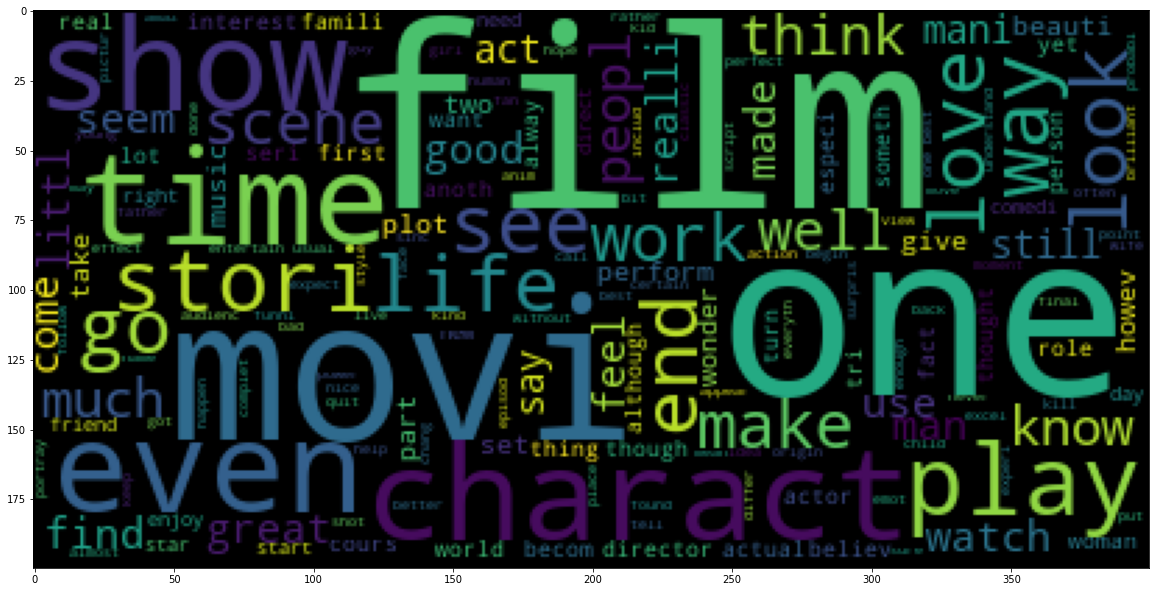

In [18]:
########################## WordCloud Positive Reviews ##################################
#Need to fix this
# Creating a list of train and test data to analyse
df_freq = df_pos
imdb_list = df_freq["review"][df_freq.label.isin(['pos'])].unique().tolist()
imdb_bow = " ".join(imdb_list)

# Create a word cloud for psitive words
imdb_wordcloud = WordCloud().generate(imdb_bow)

# Show the created image of word cloud
plt.figure(figsize=(20, 20))
plt.imshow(imdb_wordcloud)
plt.show()

**Word-Cloud Visaliation for Negative Labelled Reviews**

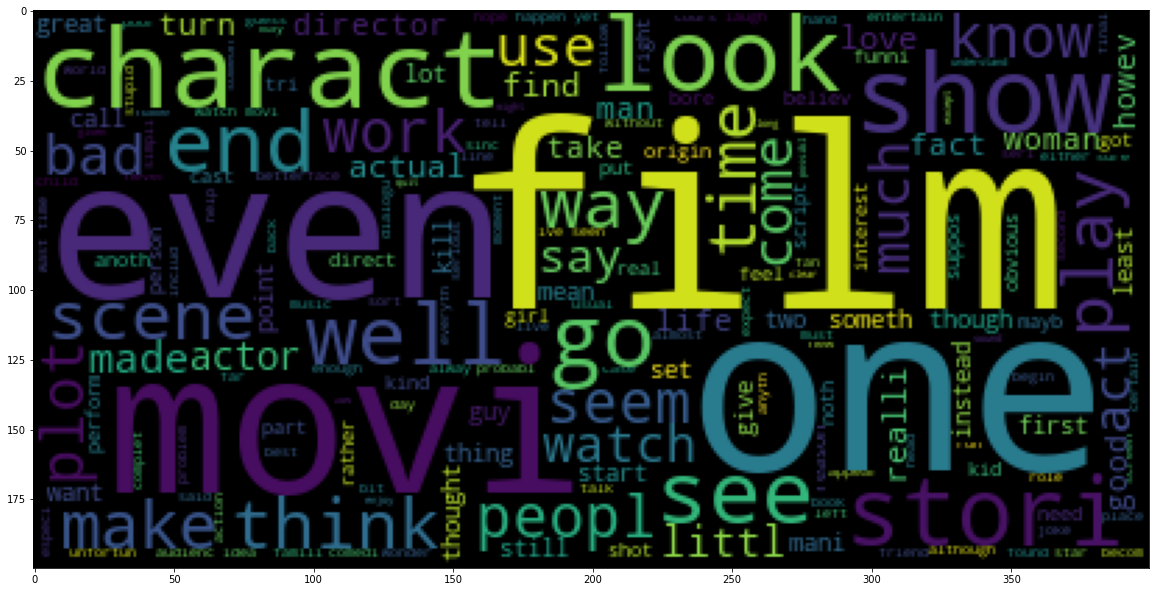

In [19]:
########################## WordCloud Negative Train & Test set ##################################

# Creating a list of train and test data to analyse
df_freq = df_neg
imdb_list = df_freq["review"][df_freq.label.isin(['neg'])].unique().tolist()
imdb_bow = " ".join(imdb_list)

# Create a word cloud for negative words
imdb_wordcloud = WordCloud().generate(imdb_bow)

# Show the created image of word cloud
plt.figure(figsize=(20, 20))
plt.imshow(imdb_wordcloud)
plt.show()

# **Preparing final datset for Predicitive Modelling**


---
Creating required dataset and applying Machine Learning Model


**Naive Byers Model**

In [20]:
df_master.head()
df_TrainSep = df_master.query('type =="train"')
df_TestSep = df_master.query('type == "test"')
df_TrainSep.head()
df_TestSep.head()

,type,review,label,file
0,test,mr costner drag movi far longer necessari asid...,neg,0_2.txt
1,test,exampl major action film same generic bore the...,neg,10000_4.txt
2,test,first hate moron rapper couldnt act gun press ...,neg,10001_1.txt
3,test,even beatl could write song everyon like altho...,neg,10002_3.txt
4,test,brass pictur movi fit word them realli somewha...,neg,10003_3.txt


# **Applying Naive Byers Model**

---
1. Apply NB Model to the original 50-50 split
2. Apply NB Model to custom 80-20 split

Firstly, we will apply Naive Byers Model to the oiginal 50-50 train & test split and measure its accuracy

In [21]:
#######################################################################
#Splitting the whole datset with 50-50 Ratio as per the data provided
#######################################################################
################################## Preparing dataframe for model ##############################

imdb_temp = df_master.query('label != "unsup"')
imdb_full = imdb_temp[["review", "label"]]
df_algo = imdb_temp

################################## Splitting with feature selection data ###############################

# Vectorising the required data
vect_algo = TfidfVectorizer(stop_words='english', analyzer='word')
vect_algo.fit(df_TrainSep.review)
Xf_train = vect_algo.transform(df_algo[df_algo['type'].isin(['train'])].review)
Xf_test = vect_algo.transform(df_algo[df_algo['type'].isin(['test'])].review)

# Encoding target data
# Creating an object and fitting on target strings
le = LabelEncoder()
yf_train = le.fit_transform(df_algo[df_algo['type'].isin(['train'])].label)
yf_test = le.fit_transform(df_algo[df_algo['type'].isin(['test'])].label)

########################################### Naive Bayes #########################################

# Fit the Naive Bayes classifier model to the object
clf = MultinomialNB()
clf.fit(Xf_train, yf_train)

# predict the outcome for testing data
predictions = clf.predict(Xf_test)

# check the accuracy of the model
accuracy = accuracy_score(yf_test, predictions)
print("Observation: Naive Bayes Classification gives an accuracy of %.2f%% on the testing data" %(accuracy*100))

Observation: Naive Bayes Classification gives an accuracy of 81.84% on the testing data


To increase efficiency of the model, we will splitt the dataset with 80-20 ratio for Train & test and aplying Naive Byers again

In [22]:
####################################################################
# Splitting the whole datset into 80-20 ratio for Test & Train
####################################################################
################################## Preparing dataframe for model ##############################
imdb_temp = df_master.query('label != "unsup"')
imdb_full = imdb_temp[["review", "label"]]

################################## Splitting with feature selection data ###############################a
spt_train,spt_test = train_test_split(imdb_full,test_size=0.2, random_state=1)

################### Using TfidVectorizer to Count freq and create Sparse Matrix ###############################

# Vectorising the required data for train dataset
model_vect = TfidfVectorizer(stop_words='english', analyzer='word')
model_vect.fit(spt_train.review)
spf_x_train = model_vect.transform(spt_train.review)

# The test dataset do not need to have a count because it is going to be used for testing
# The CountVectorizer is only needed to be applied to the training dataset
spf_x_test = model_vect.transform(spt_test.review)

# Encoding target data
# Creating an object and fitting on target strings
le = LabelEncoder()
spf_y_train = le.fit_transform(spt_train.label)
spf_y_test = le.fit_transform(spt_test.label)

########################################### Naive Bayes #########################################

# Fit the Naive Bayes classifier model to the object
clf = MultinomialNB()
clf.fit(spf_x_train, spf_y_train)

# predict the outcome for testing data
predictions = clf.predict(spf_x_test)

# Print the classification reprt
print(classification_report(spf_y_test,predictions))

# check the accuracy of the model
accuracy = accuracy_score(spf_y_test, predictions)
print("Observation: Naive Bayes Classification gives an accuracy of %.2f%% on the testing data" %(accuracy*100))



              precision    recall  f1-score   support

           0       0.86      0.87      0.86      5061
           1       0.86      0.85      0.86      4939

    accuracy                           0.86     10000
   macro avg       0.86      0.86      0.86     10000
weighted avg       0.86      0.86      0.86     10000

Observation: Naive Bayes Classification gives an accuracy of 86.10% on the testing data


# **Applying Logistic Regression Model**

---
An alternate to Naive Buyers Model is Logistic Regression Model. We will fit the same 80-20 split dataset with the Logiestic Regression Model to check its accuracy




In [23]:
#########################################################################
# Applying Logistic Regression Model to the same dataset with 80-20 Split
#########################################################################
# training the model
lr = LogisticRegression(penalty='l2',max_iter=500,C=1,random_state=42)

# Fitting the Logistic Regression model to the train dataset
lr_tfidf = lr.fit(spf_x_train,spf_y_train)

# predict the outcome for testing data
lr_tfidf_predict=lr.predict(spf_x_test)

# Print the classification reprt
print(classification_report(spf_y_test,lr_tfidf_predict))

# check the accuracy of the model
lr_tfidf_score=accuracy_score(spf_y_test,lr_tfidf_predict)
print("Observation: Logistic Regression Model gives an accuracy of %.2f%% on the testing data" %(lr_tfidf_score*100))

              precision    recall  f1-score   support

           0       0.91      0.88      0.89      5061
           1       0.88      0.91      0.89      4939

    accuracy                           0.89     10000
   macro avg       0.89      0.89      0.89     10000
weighted avg       0.89      0.89      0.89     10000

Observation: Logistic Regression Model gives an accuracy of 89.29% on the testing data


# **10 Fold Cross-Validation Method**

---
To measure the afficinecy of the model, we will spit the enitre data set into 10 folds and perfrom Naive Byers & Logistic Regression on them.


Applying 10 Fold Cross Validation to the dataset and fitting it with Naive Byers Model.

---


The aim is to have 10 iteration of the dataset measure the accuracy after fitting the iteration with Naive Byers Model.
The average arruracy for all the 10 Iteration would provide a better understanding on the efficiency of the model.

In [39]:
#Applying 10Fold CrossValidation on the dataset to doublecheck the accuracy of the Naive Byers Model.

#Spilling the Train & Test dataset based on 80-20 Ratio
data_x = imdb_temp["review"]
data_y = imdb_temp["label"]

# Splitting the data in 10 folds using the StratifiedKFold
skf = StratifiedKFold(n_splits=10, shuffle=True, random_state=0)
for train_index, test_index in skf.split(data_x, data_y):
    x_train, x_test = data_x[train_index], data_x[test_index]
    y_train, y_test = data_y[train_index], data_y[test_index]

    tfidf = TfidfVectorizer()
    x_train = tfidf.fit_transform(x_train)
    x_test = tfidf.transform(x_test)

    clf = MultinomialNB()
    clf.fit(x_train, y_train)
    y_pred = clf.predict(x_test)
    score = accuracy_score(y_test, y_pred)
    print("Observation: Naive Byers Model with Stratified Kfold gives an accuracy of %.2f%% on the testing data" %(score*100))

#Getting Average Accuracy for all 10 Fold
AvgScore = cross_val_score(clf,x_train,y_train,cv=skf,scoring='accuracy').mean() * 100
print("Average Naive Byers Model Accuracy (Stratified 10K fold): %.2f%% on the testing data" %(AvgScore))

Observation: Naive Byers Model with Stratified Kfold gives an accuracy of 86.18% on the testing data
Observation: Naive Byers Model with Stratified Kfold gives an accuracy of 85.40% on the testing data
Observation: Naive Byers Model with Stratified Kfold gives an accuracy of 85.88% on the testing data
Observation: Naive Byers Model with Stratified Kfold gives an accuracy of 85.66% on the testing data
Observation: Naive Byers Model with Stratified Kfold gives an accuracy of 86.38% on the testing data
Observation: Naive Byers Model with Stratified Kfold gives an accuracy of 85.58% on the testing data
Observation: Naive Byers Model with Stratified Kfold gives an accuracy of 86.12% on the testing data
Observation: Naive Byers Model with Stratified Kfold gives an accuracy of 86.46% on the testing data
Observation: Naive Byers Model with Stratified Kfold gives an accuracy of 85.98% on the testing data
Observation: Naive Byers Model with Stratified Kfold gives an accuracy of 86.08% on the tes

## **Applying 10 Fold Cross Validation to the dataset and fitting it with Logistic Regression Model.**
---

The aim is to have 10 iteration of the dataset measure the accuracy after fitting each iteration with the Model.
The average arruracy for all the 10 Iteration would provide a better understanding on the efficiency of the model.

In [40]:
#Applying 10Fold CrossValidation on the dataset to doublecheck the accuracy of the Naive Byers Model.

#Spilling the Train & Test dataset based on 80-20 Ratio
data_x = imdb_temp["review"]
data_y = imdb_temp["label"]

# Splitting the data in 10 folds using the StratifiedKFold
skf = StratifiedKFold(n_splits=10, shuffle=True, random_state=0)
for train_index, test_index in skf.split(data_x, data_y):
    x_train, x_test = data_x[train_index], data_x[test_index]
    y_train, y_test = data_y[train_index], data_y[test_index]

    tfidf = TfidfVectorizer()
    x_train = tfidf.fit_transform(x_train)
    x_test = tfidf.transform(x_test)

    clf = LogisticRegression(penalty='l2',max_iter=500,C=1,random_state=42)
    clf.fit(x_train, y_train)
    y_pred = clf.predict(x_test)
    
    #Getting Individual Accuracy for each Fold
    score = accuracy_score(y_test, y_pred)
    print("Observation: Logistic Regression Model with Stratified Kfold gives an accuracy of %.2f%% on the testing data" %(score*100))

#Getting Average Accuracy for all 10 Fold
AvgScore = cross_val_score(clf,x_train,y_train,cv=skf,scoring='accuracy').mean() * 100
print("Average Logistic Regression Model Accuracy (Stratified 10K fold): %.2f%% on the testing data" %(AvgScore))


Observation: Logistic Regression Model with Stratified Kfold gives an accuracy of 90.04% on the testing data
Observation: Logistic Regression Model with Stratified Kfold gives an accuracy of 89.10% on the testing data
Observation: Logistic Regression Model with Stratified Kfold gives an accuracy of 89.50% on the testing data
Observation: Logistic Regression Model with Stratified Kfold gives an accuracy of 89.40% on the testing data
Observation: Logistic Regression Model with Stratified Kfold gives an accuracy of 90.06% on the testing data
Observation: Logistic Regression Model with Stratified Kfold gives an accuracy of 89.16% on the testing data
Observation: Logistic Regression Model with Stratified Kfold gives an accuracy of 88.76% on the testing data
Observation: Logistic Regression Model with Stratified Kfold gives an accuracy of 89.94% on the testing data
Observation: Logistic Regression Model with Stratified Kfold gives an accuracy of 89.06% on the testing data
Observation: Logist

# **Summary:**

---
**Naive Byers Model**
> * Naive Byers Model efficiency with 80-20 split: **86.10%**
> * Naive Byers Model efficiency with 10K fold: **85.88%**

**Logistic Regression Model**
> * Logistic Regression Model efficiency with 80-20 split: **89.29%**
> * Logistic Regression Model efficiency with 10K fold: **89.26%**

**Conclusion:** *The Logistic Regerssion is more efficient than Naive Byers Model on the above dataset.*

---